In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn import OneHotEncoder

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *
from metrics import *
from validation import *

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [2]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

In [3]:
seed = 3
np.random.seed(seed)
net = Network(MSE(1), eta=1e-4)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=16,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-6),
    activation=ReLU(),
    momentum=('Standard',1e-5)
)


net.add_layer(
    input_size=16,
    units_size=16,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-6),
    activation=Identity(),
    momentum=('Standard',1e-5)
)
net.add_layer(
    input_size=16,
    units_size=3,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-6),
    activation=Identity(),
    momentum=('Standard',1e-5)
)

('Standard', 1e-05)
('Standard', 1e-05)
('Standard', 1e-05)


In [3]:
seed = 3

net = create_all_net(
    seed=seed,
    loss="MSE",
    batch_size=1,
    input_size=len(X_train[0]),
    num_layer=3,
    layers_size=[16,16,3],
    starting=["Range_random", "Range_random", "Range_random"],
    starting_range=[(-0.5,0.5),(-0.5,0.5),(-0.5,0.5)],
    activations=["ReLU", "ReLU", "Identity"],
    regularizers=["L2", "None", "L2"],
    regularizers_lambda=[1e-6,0,1e-6],
    momentums=[("Standard", 1e-5), ("None", 0), ("Standard", 1e-5)],
    eta=1e-4
)

In [55]:

regularizers=["L2", "None", "L2"]
regularizers_lambda=[1e-6,0,1e-6]
regularizers_ = []

for i, reg in enumerate(regularizers):
    print(reg)
    if reg != "None":
        regularizers_.append(eval(reg)(lambda_=regularizers_lambda[i]))
    else:
        regularizers_.append(None)

for i in regularizers_:
    print(type(i))

L2
None
L2
<class 'regularizers.L2'>
<class 'NoneType'>
<class 'regularizers.L2'>


In [8]:
print(net)
type(net.loss)


Network: 3 layers 
Loss: MSE


str

Epochs:  64%|██████▍   | 1604/2500 [00:43<00:24, 37.18it/s]


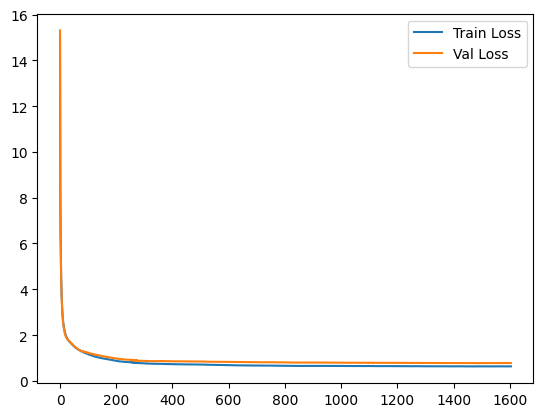

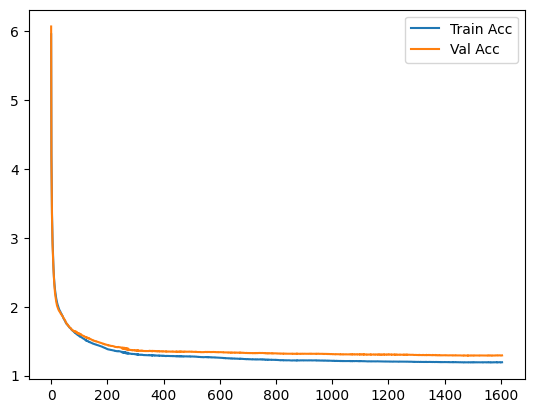

Epochs:  16%|█▌        | 397/2500 [00:10<00:58, 36.19it/s]


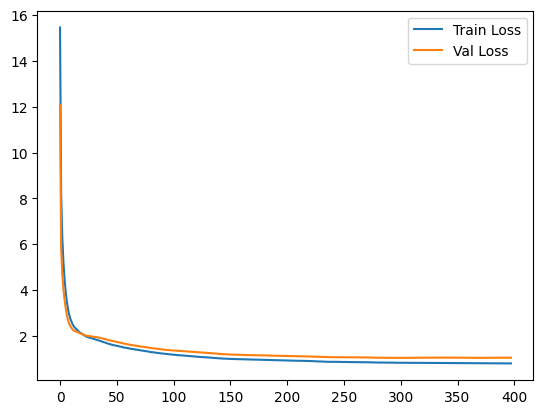

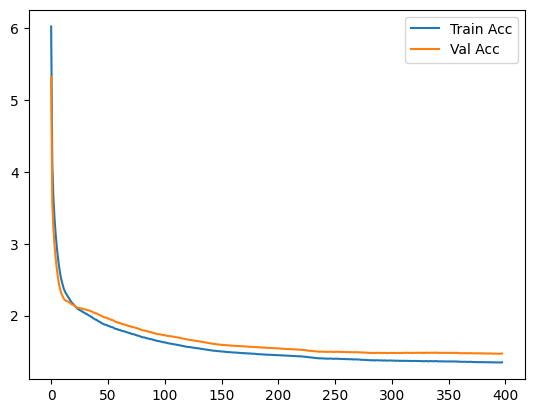

Epochs:  19%|█▊        | 468/2500 [00:12<00:56, 36.24it/s]


KeyboardInterrupt: 

In [4]:
statistics = kfold_crossval(
    X=X_train,
    y=y_train,
    k=6,
    net=net,
    epochs=2500,
    patience=100,
    seed=seed,
    metric=MEE()
)

print(statistics)

In [22]:
import itertools

# Define the hyperparameters as dictionaries
hyperparameters = {
    'losses': ["MSE"],
    'layers_sizes': [[20, 3], [3]],
    'activations': ["ReLU", "Identity"], 
    'startings': ["Range_random"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L1"],
    'regularizers_lambda': [1e-6],
    'momentums': [('Nesterov', 1e-4)],
    'etas': [1e-4]
}

# Create a list of all the possible combinations using itertools.product
hyperparameter_combinations = list(itertools.product(*hyperparameters.values()))

all_dics = []
# Print the result or use it as needed
for combination in hyperparameter_combinations:
    hyperparameter_dict = dict(zip(hyperparameters.keys(), combination))
    print(hyperparameter_dict)
    all_dics.append(hyperparameter_dict)

{'losses': 'MSE', 'layers_sizes': [20, 3], 'activations': 'ReLU', 'startings': 'Range_random', 'startings_range': (-0.5, 0.5), 'regularizers': 'L1', 'regularizers_lambda': 1e-06, 'momentums': ('Nesterov', 0.0001), 'etas': 0.0001}
{'losses': 'MSE', 'layers_sizes': [20, 3], 'activations': 'Identity', 'startings': 'Range_random', 'startings_range': (-0.5, 0.5), 'regularizers': 'L1', 'regularizers_lambda': 1e-06, 'momentums': ('Nesterov', 0.0001), 'etas': 0.0001}
{'losses': 'MSE', 'layers_sizes': [3], 'activations': 'ReLU', 'startings': 'Range_random', 'startings_range': (-0.5, 0.5), 'regularizers': 'L1', 'regularizers_lambda': 1e-06, 'momentums': ('Nesterov', 0.0001), 'etas': 0.0001}
{'losses': 'MSE', 'layers_sizes': [3], 'activations': 'Identity', 'startings': 'Range_random', 'startings_range': (-0.5, 0.5), 'regularizers': 'L1', 'regularizers_lambda': 1e-06, 'momentums': ('Nesterov', 0.0001), 'etas': 0.0001}


In [23]:
for i in all_dics:
    print(*i.values())

MSE [20, 3] ReLU Range_random (-0.5, 0.5) L1 1e-06 ('Nesterov', 0.0001) 0.0001
MSE [20, 3] Identity Range_random (-0.5, 0.5) L1 1e-06 ('Nesterov', 0.0001) 0.0001
MSE [3] ReLU Range_random (-0.5, 0.5) L1 1e-06 ('Nesterov', 0.0001) 0.0001
MSE [3] Identity Range_random (-0.5, 0.5) L1 1e-06 ('Nesterov', 0.0001) 0.0001


In [24]:
losses_ = "MSE"

startings_ = []
startings_range_ = []
activations_ = []
regularizers_ = []
regularizers_lambda_ = []
momentums_ = []


for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    startings_ = []
    activations_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    startings_range_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    
    print(layers_sizes_)
    print(activations_)
    print(startings_)
    print(startings_range_)
    print(regularizers_)
    print(regularizers_lambda_)
    print(momentums_)
    print(etas_)
    print("\n")

[20, 3]
['ReLU', 'Identity']
['Range_random', 'Range_random']
[(-0.5, 0.5), (-0.5, 0.5)]
['L1', 'L1']
[1e-06, 1e-06]
[('Nesterov', 0.0001), ('Nesterov', 0.0001)]
0.0001


[20, 3]
['Identity', 'Identity']
['Range_random', 'Range_random']
[(-0.5, 0.5), (-0.5, 0.5)]
['L1', 'L1']
[1e-06, 1e-06]
[('Nesterov', 0.0001), ('Nesterov', 0.0001)]
0.0001


[3]
['Identity']
['Range_random']
[(-0.5, 0.5)]
['L1']
[1e-06]
[('Nesterov', 0.0001)]
0.0001


[3]
['Identity']
['Range_random']
[(-0.5, 0.5)]
['L1']
[1e-06]
[('Nesterov', 0.0001)]
0.0001


In [4]:
data_to_csv = [["Loss func","Size", "Activation", "Starting", "Range", "Regularizer", "lambda", "Momentum", "Eta", "tLoss", "tMetric", "vLoss", "vMetric"]]

Epochs:  22%|██▏       | 1084/5000 [00:21<01:18, 49.77it/s]


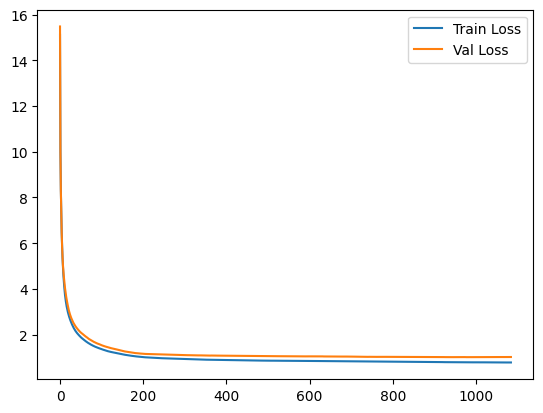

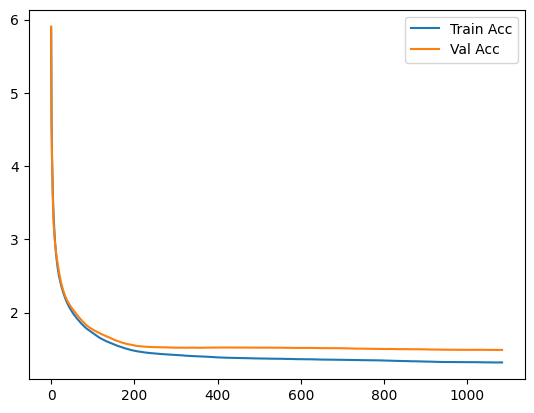

Epochs:  13%|█▎        | 635/5000 [00:13<01:29, 48.75it/s]


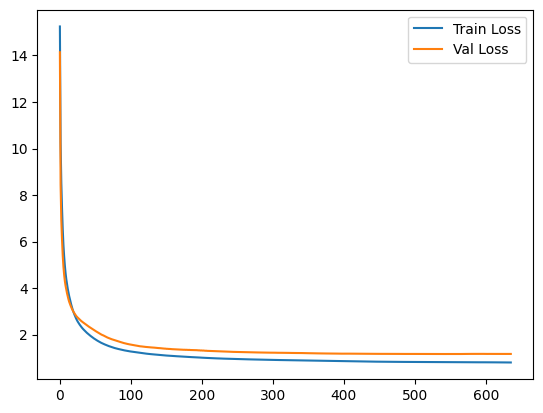

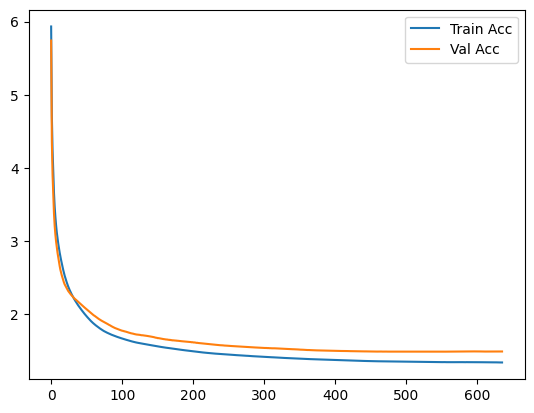

Epochs:  20%|█▉        | 982/5000 [00:20<01:23, 48.19it/s]


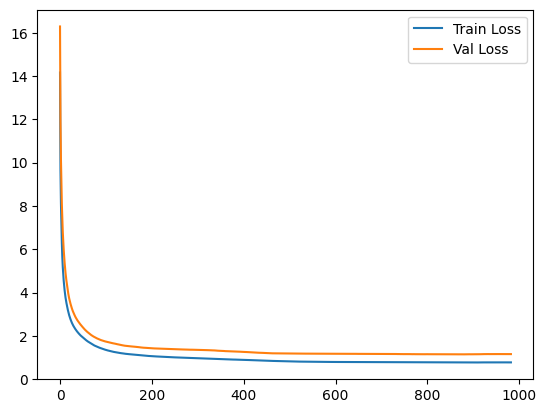

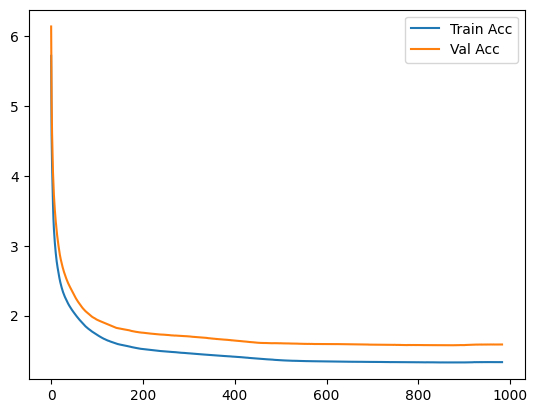

Epochs:  20%|██        | 1004/5000 [00:21<01:23, 47.70it/s]


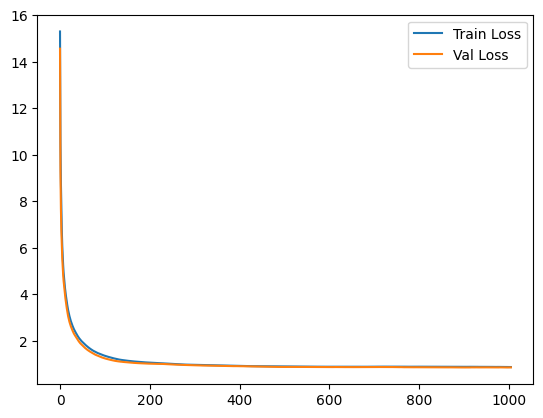

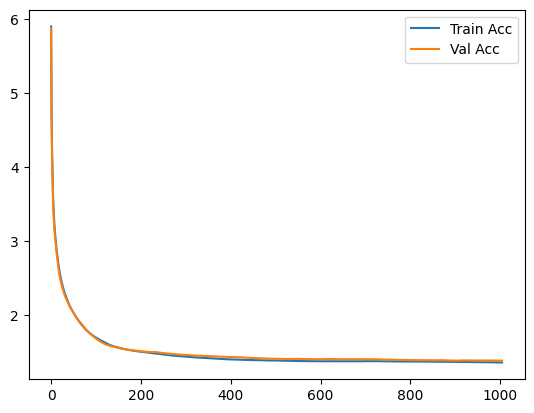

Epochs:  22%|██▏       | 1082/5000 [00:22<01:22, 47.54it/s]


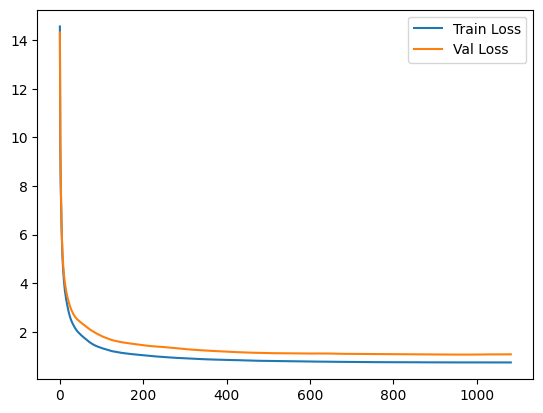

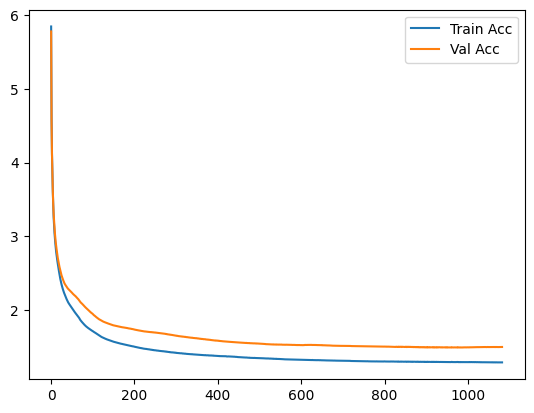

Epochs:  22%|██▏       | 1109/5000 [00:23<01:21, 47.48it/s]


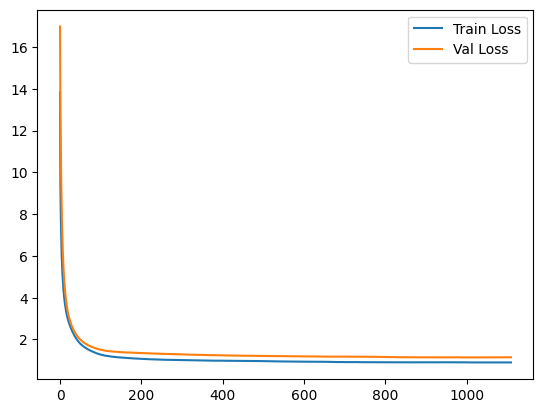

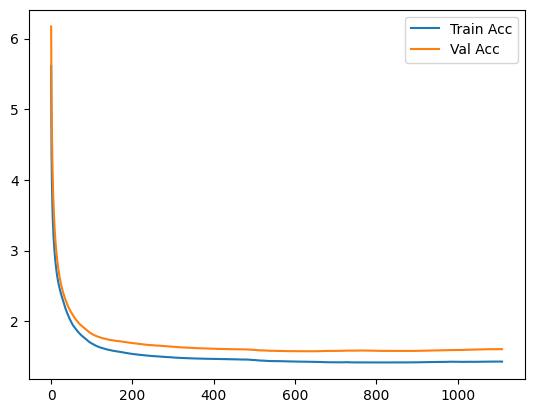

{'tr_loss': 0.8157072241502301, 'tr_metric': 1.3466365278697365, 'val_loss': 1.062772324145065, 'val_metric': 1.5033361538507426}


Epochs:   2%|▏         | 108/5000 [00:01<01:29, 54.52it/s]


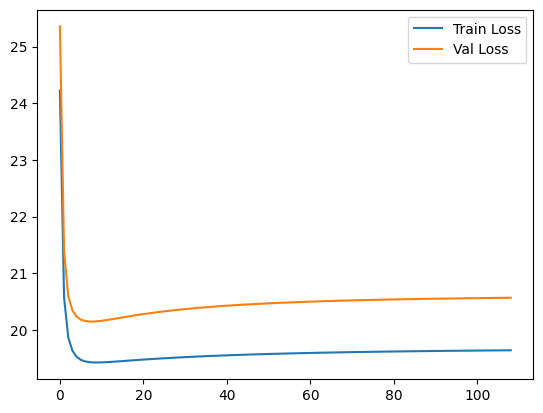

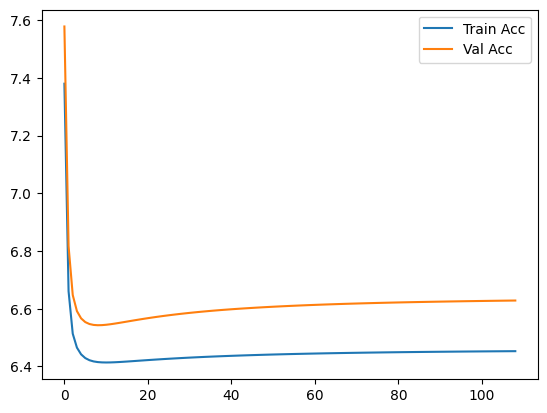

Epochs:   2%|▏         | 113/5000 [00:02<01:29, 54.41it/s]


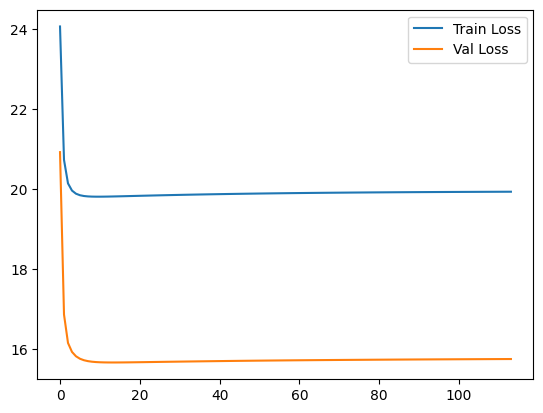

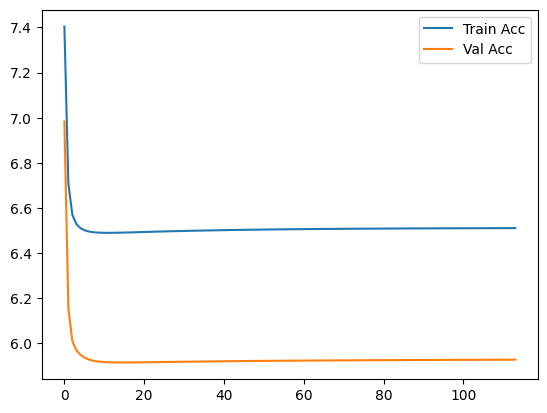

Epochs:   2%|▏         | 103/5000 [00:01<01:30, 54.07it/s]


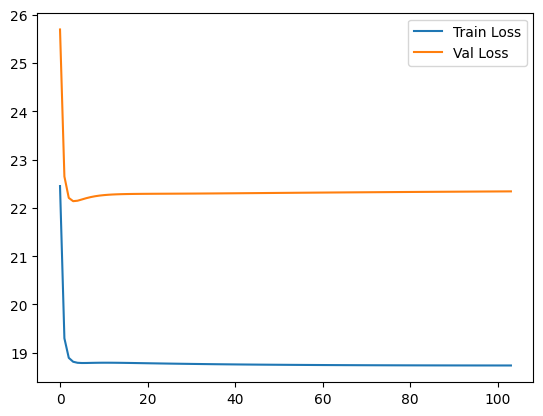

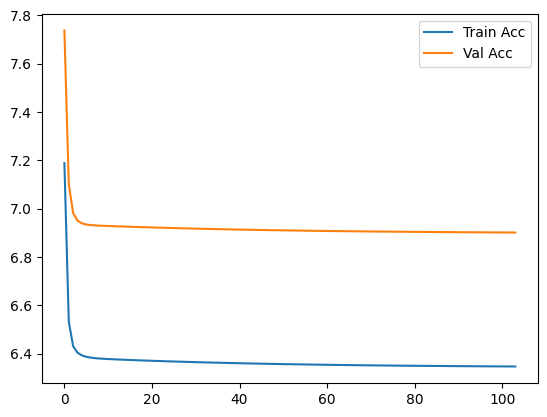

Epochs:   3%|▎         | 162/5000 [00:02<01:29, 54.33it/s]


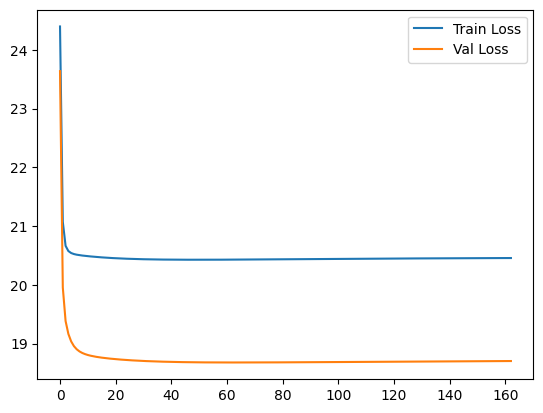

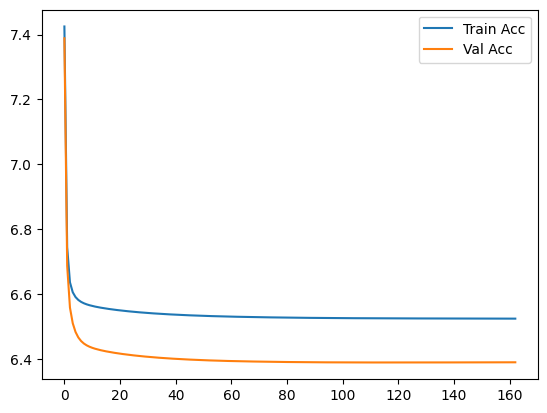

Epochs:   2%|▏         | 104/5000 [00:01<01:31, 53.59it/s]


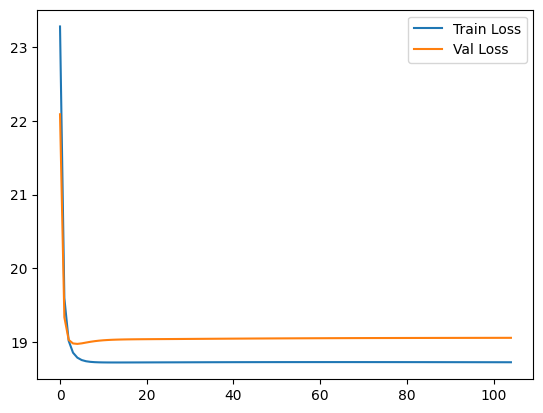

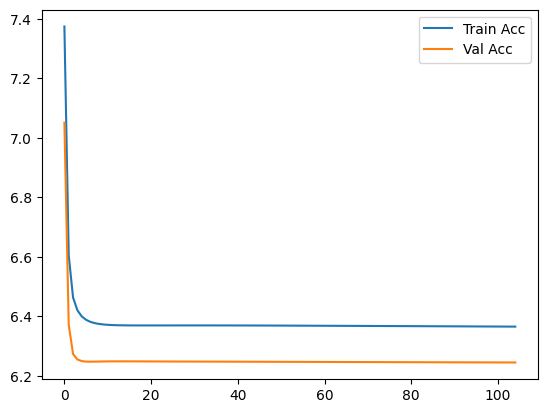

Epochs:   2%|▏         | 104/5000 [00:01<01:32, 52.78it/s]


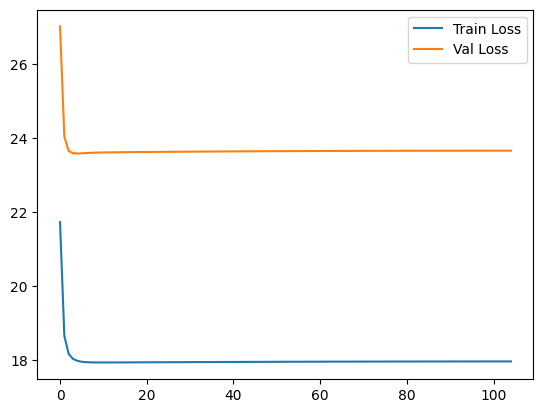

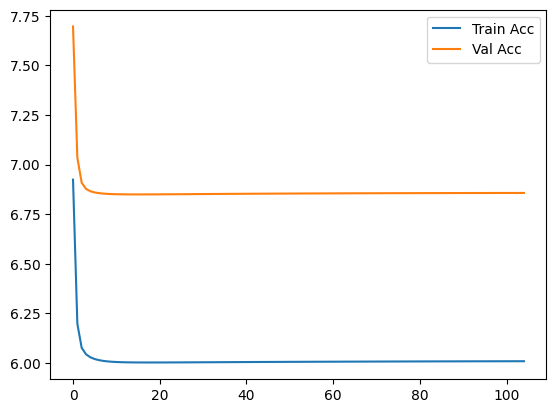

{'tr_loss': 19.2091699466141, 'tr_metric': 6.378107300899153, 'val_loss': 19.863880194007553, 'val_metric': 6.48624669820317}


Epochs:   6%|▌         | 303/5000 [00:03<00:46, 100.60it/s]


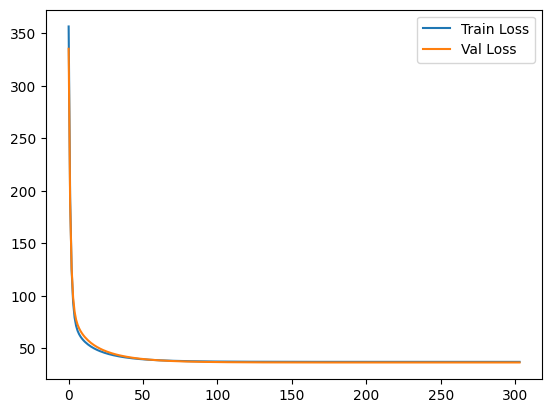

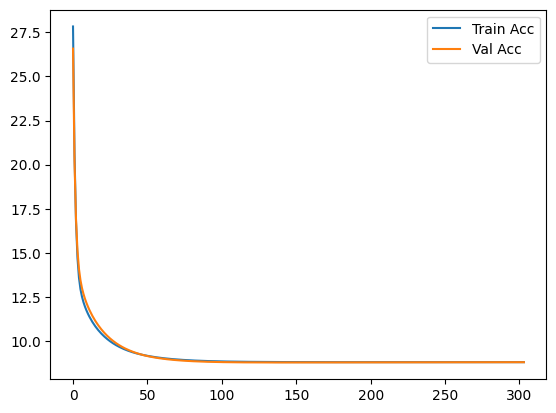

Epochs:  58%|█████▊    | 2883/5000 [00:27<00:20, 103.77it/s]


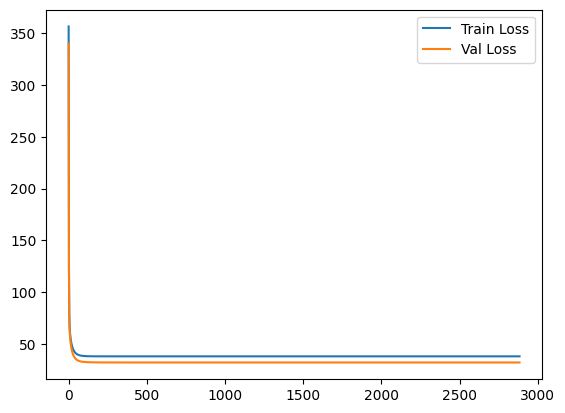

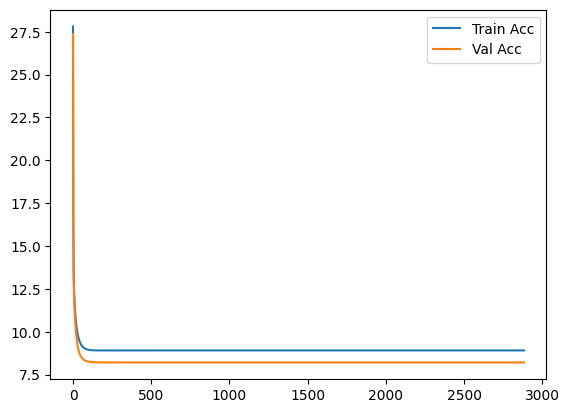

Epochs:   4%|▍         | 192/5000 [00:01<00:47, 101.89it/s]


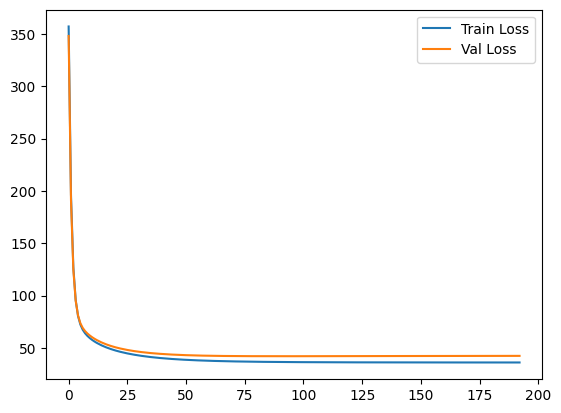

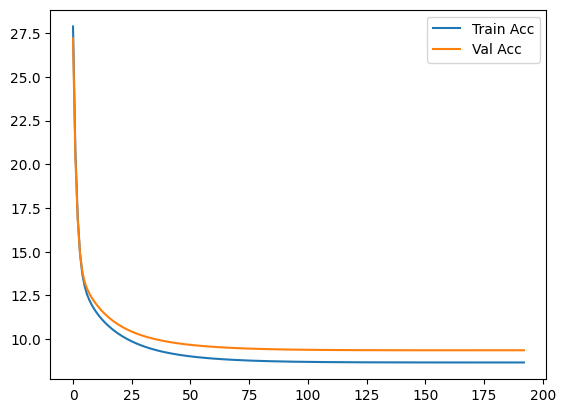

Epochs:  54%|█████▍    | 2696/5000 [00:26<00:22, 103.32it/s]


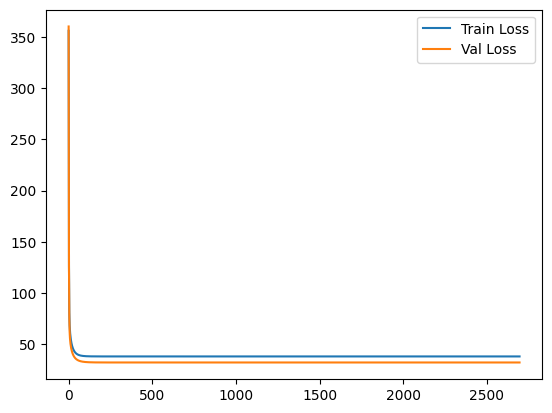

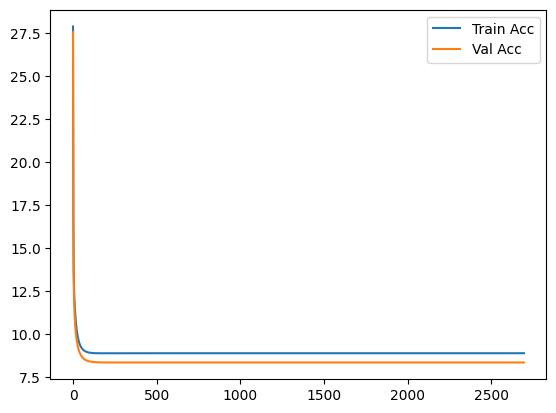

Epochs:  21%|██▏       | 1065/5000 [00:10<00:38, 103.04it/s]


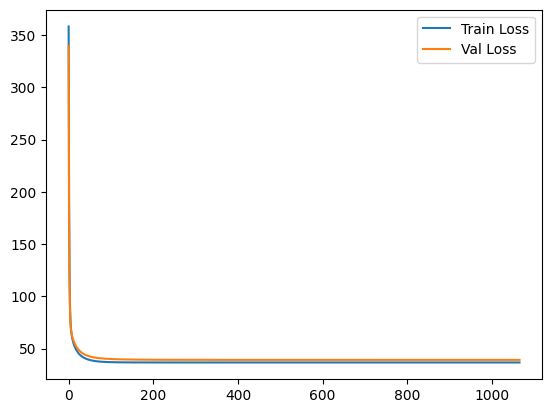

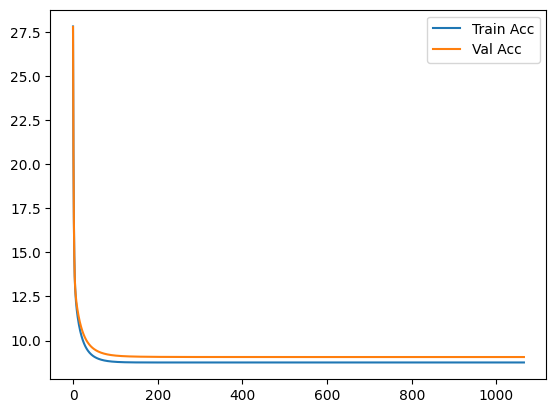

Epochs:   5%|▍         | 240/5000 [00:02<00:46, 101.62it/s]


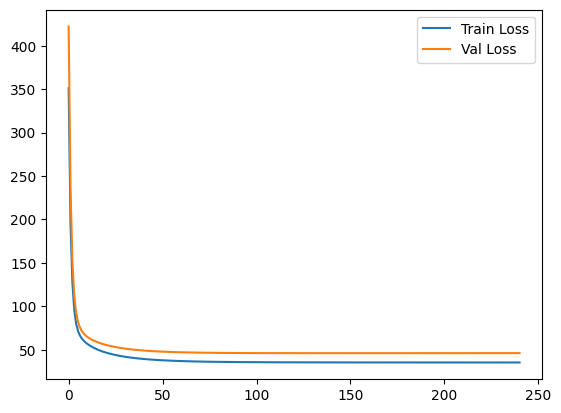

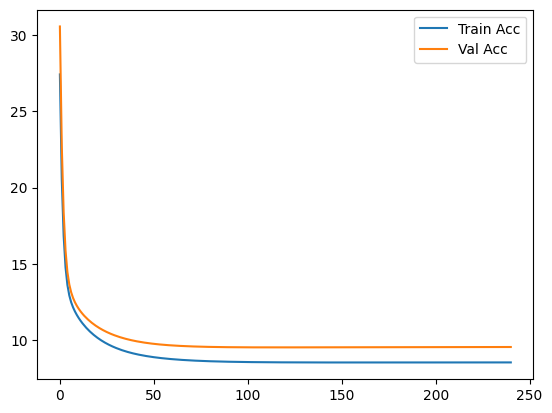

{'tr_loss': 37.01843440619528, 'tr_metric': 8.769251154811425, 'val_loss': 38.06503962652971, 'val_metric': 8.892970076062996}


Epochs:   6%|▌         | 303/5000 [00:02<00:46, 101.79it/s]


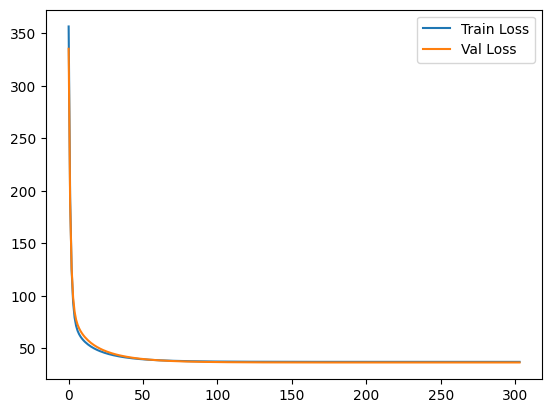

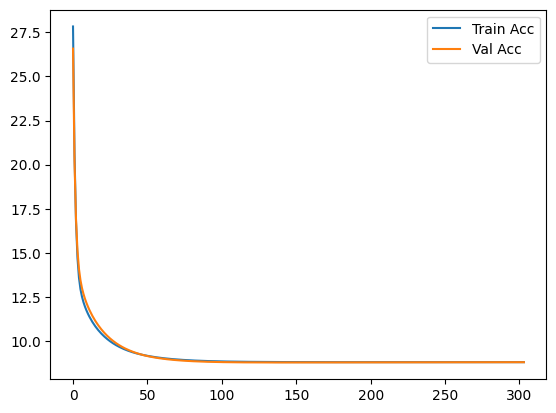

Epochs:  58%|█████▊    | 2883/5000 [00:27<00:20, 103.35it/s]


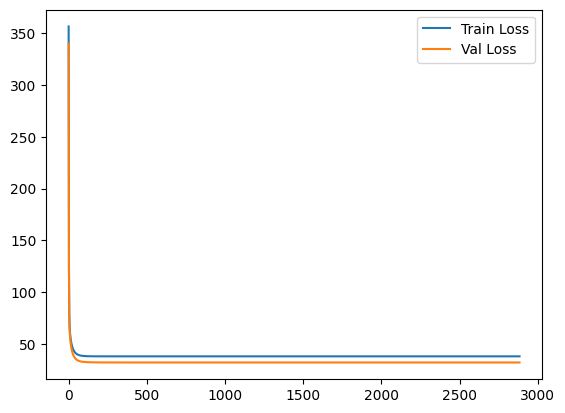

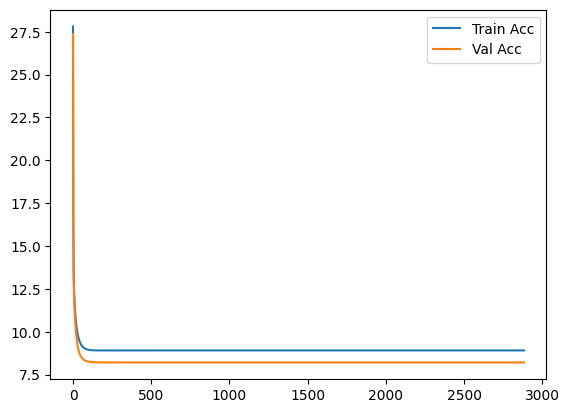

Epochs:   4%|▍         | 192/5000 [00:01<00:46, 102.77it/s]


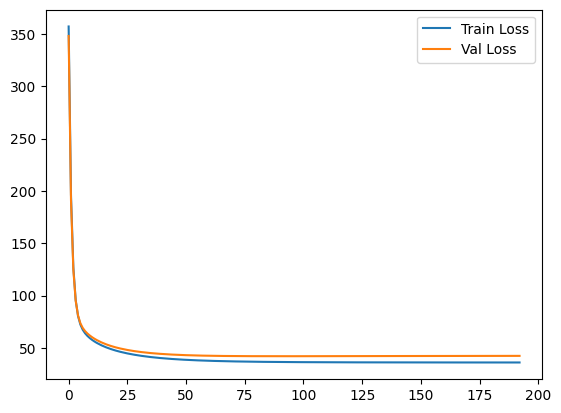

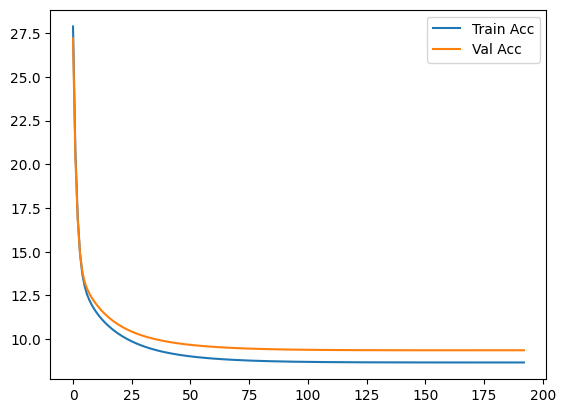

Epochs:  54%|█████▍    | 2696/5000 [00:26<00:22, 102.76it/s]


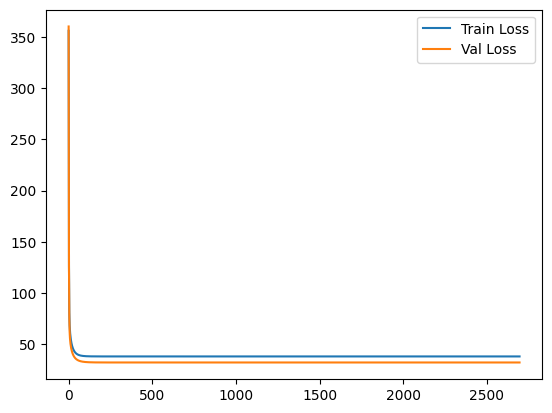

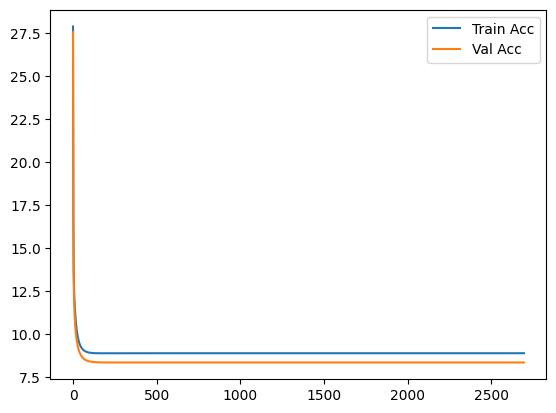

Epochs:  21%|██▏       | 1065/5000 [00:10<00:38, 103.11it/s]


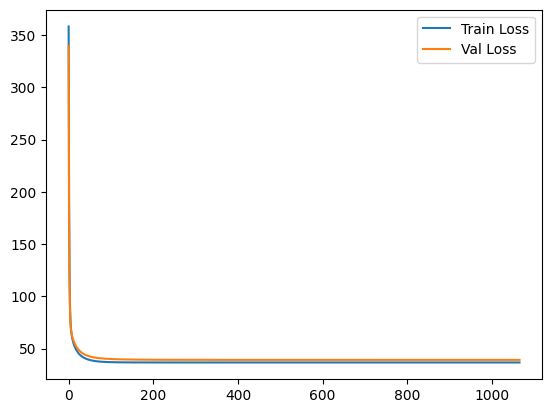

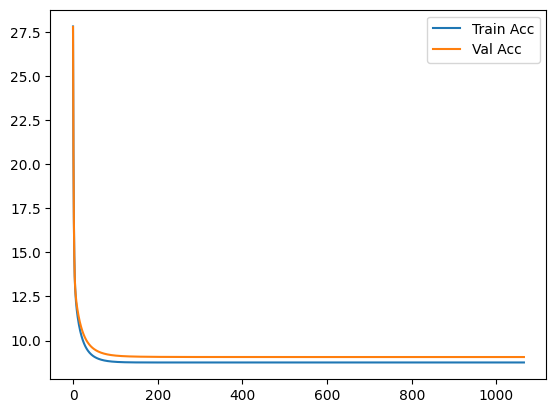

Epochs:   5%|▍         | 240/5000 [00:02<00:46, 102.71it/s]


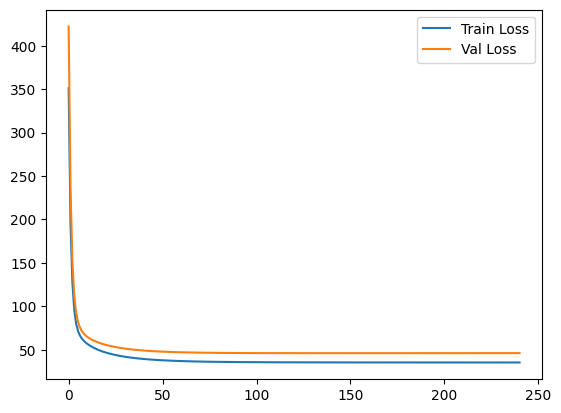

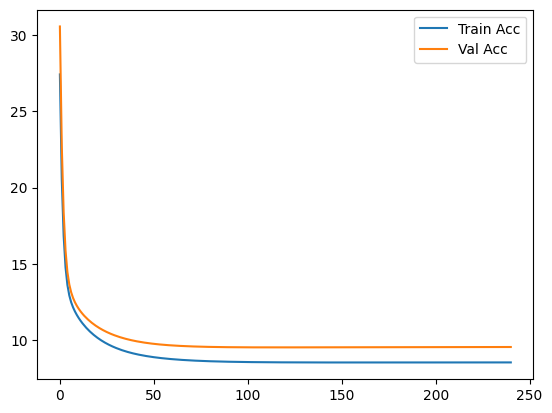

{'tr_loss': 37.01843440619528, 'tr_metric': 8.769251154811425, 'val_loss': 38.06503962652971, 'val_metric': 8.892970076062996}


In [25]:
seed = 3
data_to_csv = [[]]
losses_ = "MSE"

for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    activations_ = []
    startings_ = []
    startings_range_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    net = create_all_net(
        seed=seed,
        loss="MSE",
        batch_size=1,
        input_size=len(X_train[0]),
        num_layer=len(layers_sizes_),
        layers_size=layers_sizes_,
        activations=activations_,
        starting=startings_,
        starting_range=startings_range_,
        regularizers=regularizers_,
        regularizers_lambda=regularizers_lambda_,
        momentums=momentums_,
        eta=etas_
        )
    statistics = kfold_crossval(
        X=X_train,
        y=y_train,
        k=6,
        net=net,
        epochs=5000,
        patience=100,
        seed=seed,
        metric=MEE()
        )
    print(statistics)
    print("\n\n\n")
    data_to_csv.append(list(combination.values()) + list(statistics.values()))


In [26]:
import csv

csv_file_path = '../statistics/test.csv'
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data to the CSV file
    for row in data_to_csv:
        writer.writerow(row)    